**Problem 2.** Let $\xi_1,\xi_2,\ldots$ be a sequence of independent random variables from a given distribution. Provide a graphical illustration of the Central Limit Theorem.

*Hint:* for example, you can empirically estimate the distribution of the random variable
$
\frac{S_n - n,\mathbb{E}[\xi_1]}{\sqrt{n,\mathrm{D}\xi_1}}
$
for different values of $n$ (e.g., $n = 5, 10, 20, 40, 80, \ldots$) and compare it with the standard normal distribution. You should also propose a way to compute a “distance” between these two distributions.


$$
X \sim LogN(\mu=1, \sigma^2 = 9) \Rightarrow \ln X \sim N(1, 9)
$$

$$
\textbf{CLT.}
\frac{S_n - n\,\mathbb E[\xi_1]}{\sqrt{n\,\mathbb D[\xi_1]}}
\xrightarrow[n\to \infty]{d}
\mathcal N(0,1).
$$


$$
\mathbb{E}(\xi_i)=\int_{0}^{\infty} t \cdot \frac{1}{t \sqrt{2\pi \sigma^2}} e^{-\frac{(\ln t-\mu)^2}{2\sigma^2}} dt = e^{\mu + \frac{\sigma^2}{2}} = e^\frac{11}{2}
$$


$$
\mathbb{D[\xi_1]} = (e^{\sigma^2} - 1) e^{2\mu+\sigma^2}=e^{20} - e^{11}
$$

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [12]:
n_sim = 10_000
ns = np.array([10, 100, 1000, 10_000])

In [13]:
def experiment(mu, sigma, n_sim, ns, seed=2006):
    rng = np.random.default_rng(seed)
    expected_value = np.e ** (mu + sigma**2 / 2)
    variance = (np.e ** (sigma**2) - 1) * np.e ** (2 * mu + sigma**2)
    sns.set_theme(style="whitegrid")
    sns.set_context("talk")

    fig, axes = plt.subplots(len(ns), 1, figsize=(8, 3 * len(ns)))

    means, stds, distances = [], [], []

    xlim = (-5, 5)
    xs = np.linspace(*xlim, 500)
    bins = np.linspace(*xlim, 100)

    for i, n in enumerate(ns):
        xi = rng.lognormal(mu, sigma, (n_sim, n))
        Sn = xi.sum(axis=1)
        X = (Sn - n * expected_value) / np.sqrt(n * variance)
        means.append(X.mean())
        stds.append(X.std())

        ax = axes[i]
        ax.set_xlim(xlim)
        sns.histplot(X, bins=bins, stat="density", ax=ax)
        ax.plot(xs, norm.pdf(xs), linewidth=2, color="r")
        ax.set_title(
            rf"Central Limit Theorem. $X \sim LogN({mu}, {sigma**2})$ n = {n} n_sim = {n_sim}"
        )

        emperical_cdf = np.array([(X <= x).mean() for x in xs])
        standard_cdf = norm.cdf(xs)
        distance = np.max(np.abs(emperical_cdf - standard_cdf))
        distances.append(distance)

    df = pd.DataFrame({"n": ns, "mean": means, "std": stds, "distance": distances})
    df["p"] = np.log2(df["distance"].shift(1) / df["distance"]) / np.log2(
        df["n"].shift(1) / df["n"]
    )

    print(df)
    plt.figure(figsize=(7, 5))
    plt.plot(ns, distances, marker="o")
    plt.xscale("log")
    plt.xlabel("n")
    plt.yscale("log")
    plt.ylabel("Distance to N(0,1)")
    plt.title("Distance")
    plt.grid(True)
    fig.tight_layout()
    plt.show()

       n      mean       std  distance         p
0     10 -0.002065  0.376301  0.480021       NaN
1    100  0.001550  0.508306  0.456117 -0.022184
2   1000  0.007298  0.976912  0.399800 -0.057234
3  10000 -0.008354  0.608309  0.317784 -0.099710


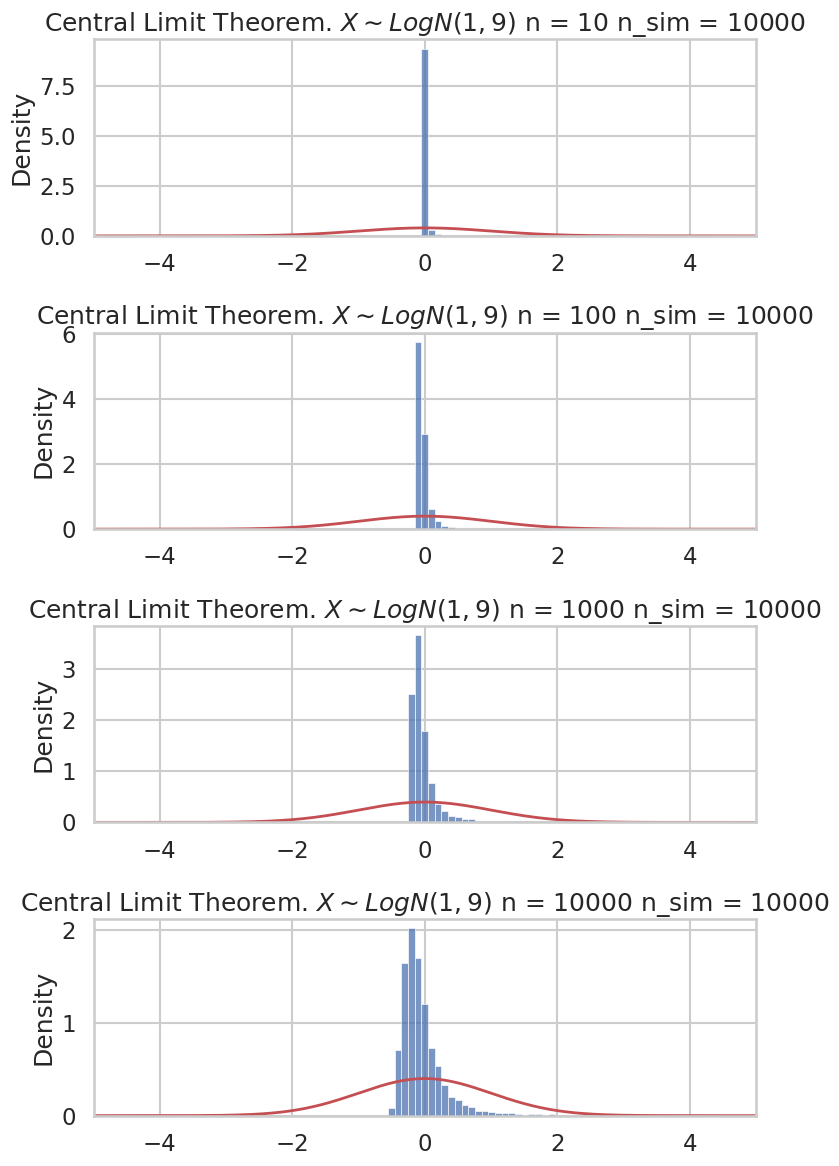

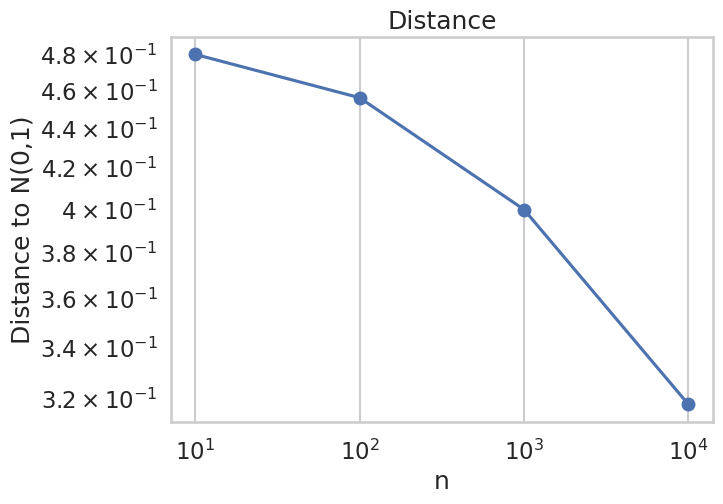

In [14]:
experiment(1, 3, n_sim, ns)

For $\sigma = 3$ we see that most of the mass is concentrated near the center, and the standard normal density curve is not clearly visible. The convergence rate is slower than the square-root rate. Experiments with larger $n$ are not feasible due to memory limitations.

       n      mean       std  distance         p
0     10 -0.004708  0.884125  0.338802       NaN
1    100  0.002867  0.989402  0.195502 -0.238795
2   1000  0.002483  1.071739  0.112479 -0.240078
3  10000 -0.010335  0.969519  0.065486 -0.234925


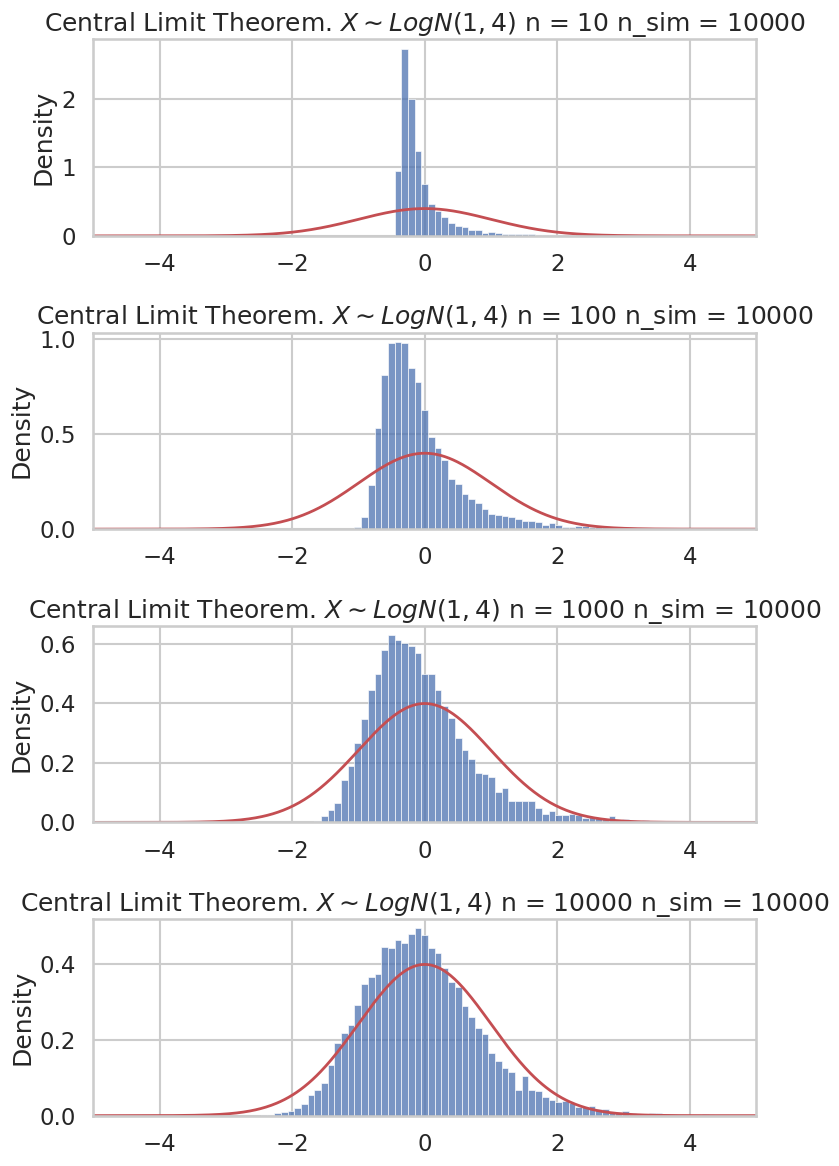

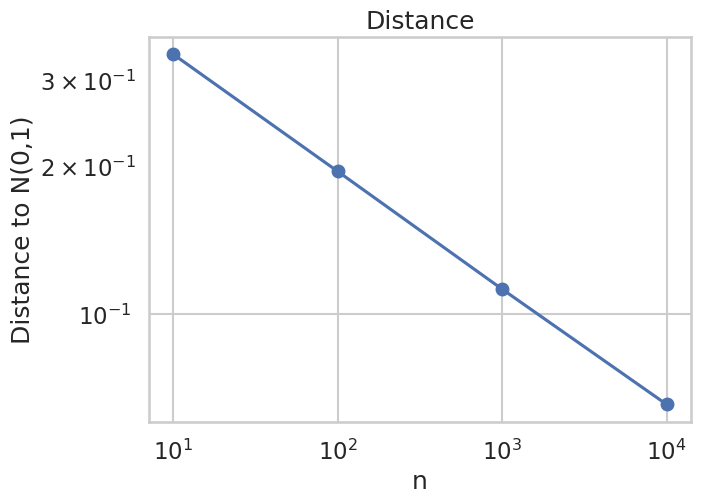

In [15]:
experiment(1, 2, n_sim, ns)

For $\sigma = 2$ the standard normal density curve is visible. The convergence rate is slower than the square-root rate, but faster than rate for $\sigma = 3$.

       n      mean       std  distance         p
0     10 -0.006220  0.986410  0.094441       NaN
1    100 -0.002701  0.995971  0.043005 -0.341638
2   1000 -0.009187  0.996180  0.017405 -0.392839
3  10000 -0.002265  0.998903  0.005003 -0.541484


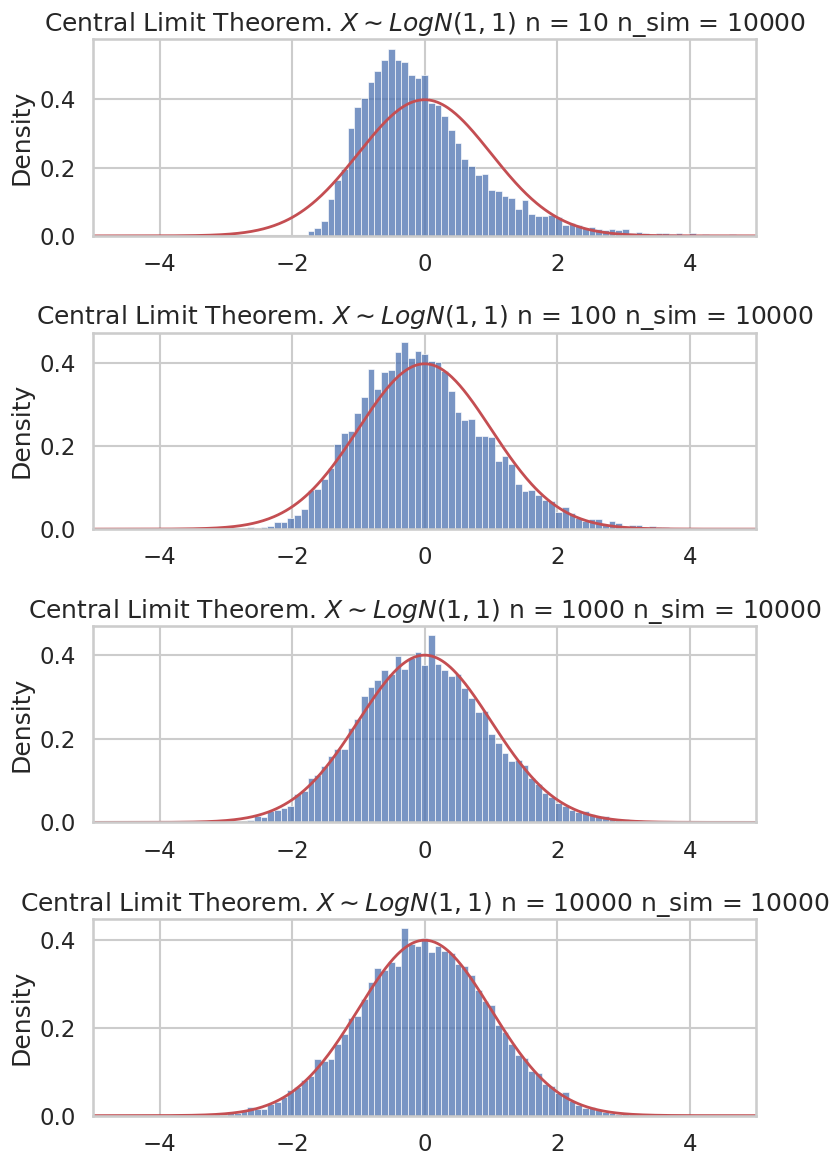

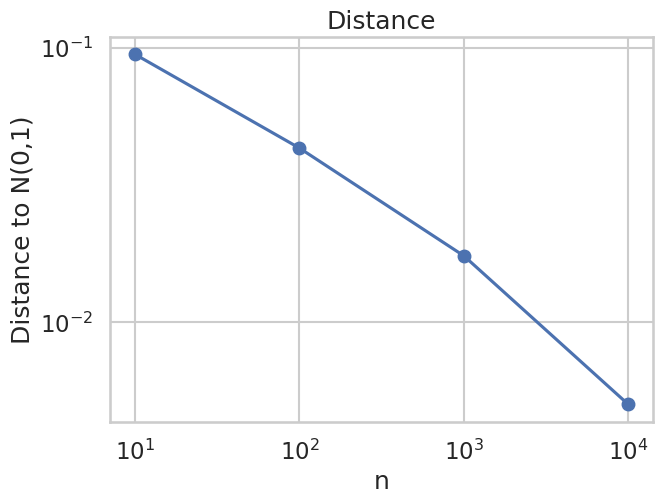

In [16]:
experiment(1, 1, n_sim, ns)

For $\sigma = 1$ the standard normal density curve is clearly visible. The convergence rate is the square-root rate.

       n      mean       std  distance         p
0     10  0.006440  0.990415  0.089672       NaN
1    100 -0.002121  0.997560  0.042070 -0.328688
2   1000  0.008394  0.994782  0.017105 -0.390836
3  10000 -0.006618  1.003171  0.007020 -0.386805


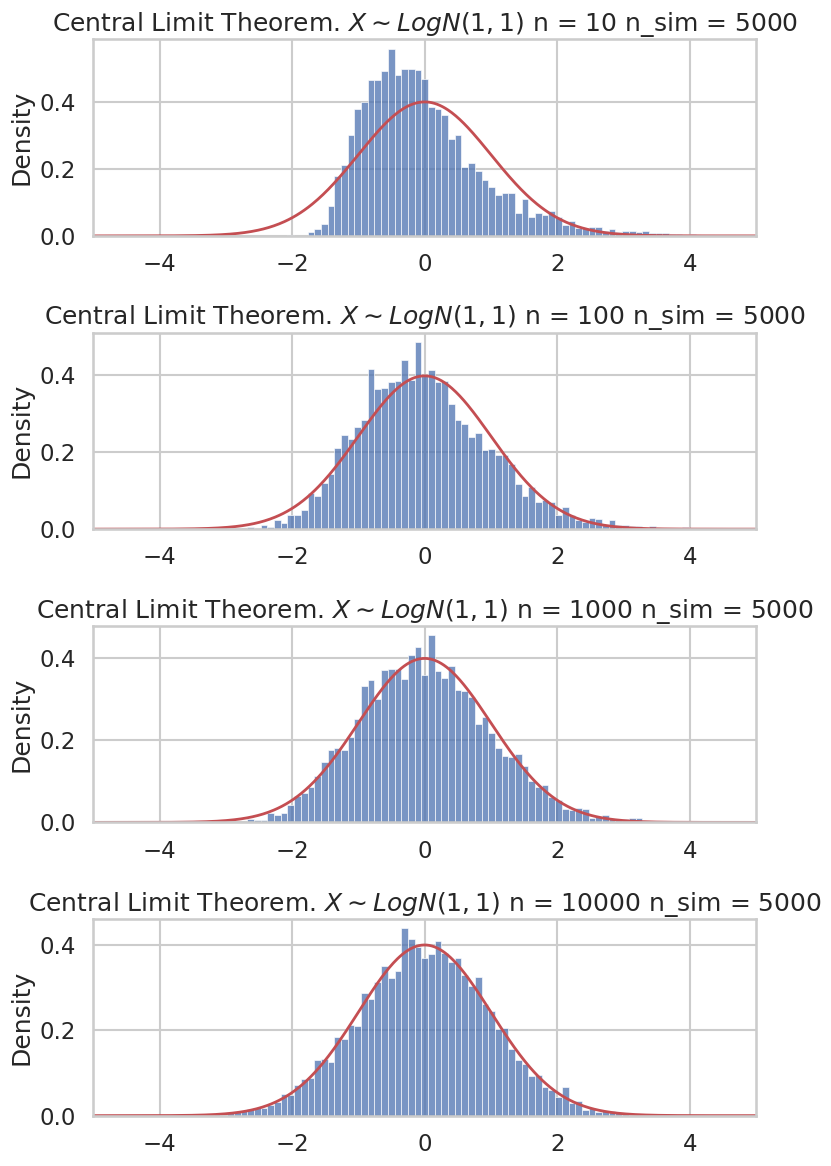

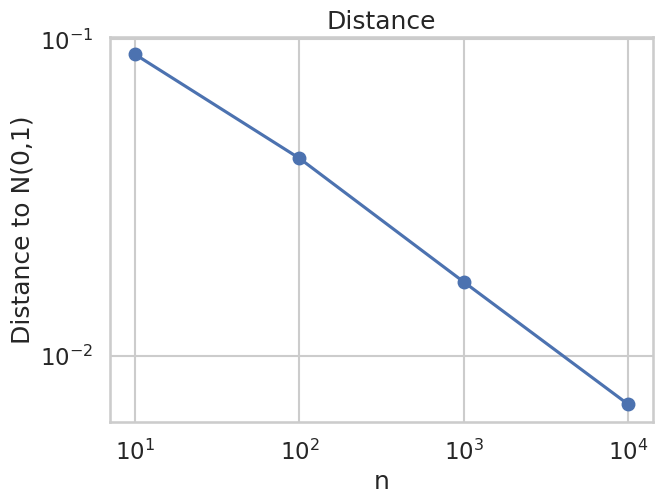

In [17]:
experiment(1, 1, 5000, ns)

       n      mean       std  distance         p
0     10 -0.030129  0.943716  0.125041       NaN
1    100 -0.003817  1.006444  0.047371 -0.421539
2   1000 -0.007988  0.990464  0.023264 -0.308834
3  10000 -0.028573  1.011266  0.031585  0.132801


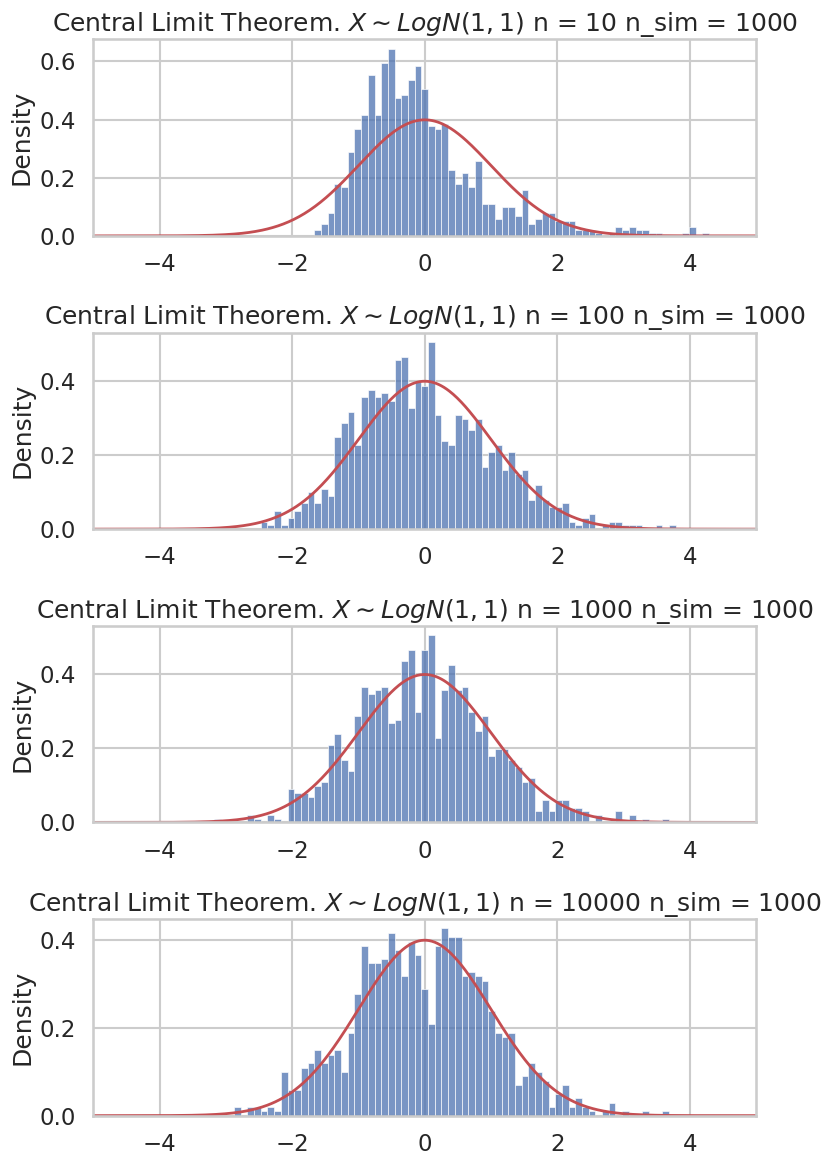

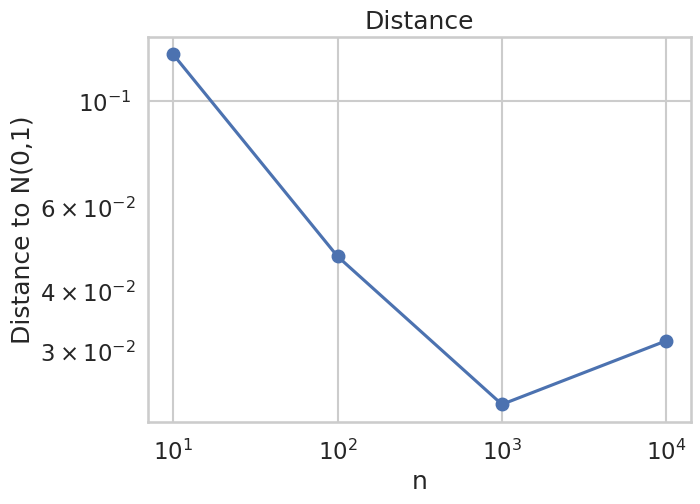

In [18]:
experiment(1, 1, 1000, ns)

       n      mean       std  distance         p
0     10 -0.090129  0.875501  0.105415       NaN
1    100 -0.112614  0.945311  0.095415 -0.043286
2   1000  0.006914  1.010495  0.050193 -0.278978
3  10000 -0.027247  0.925265  0.071133  0.151433


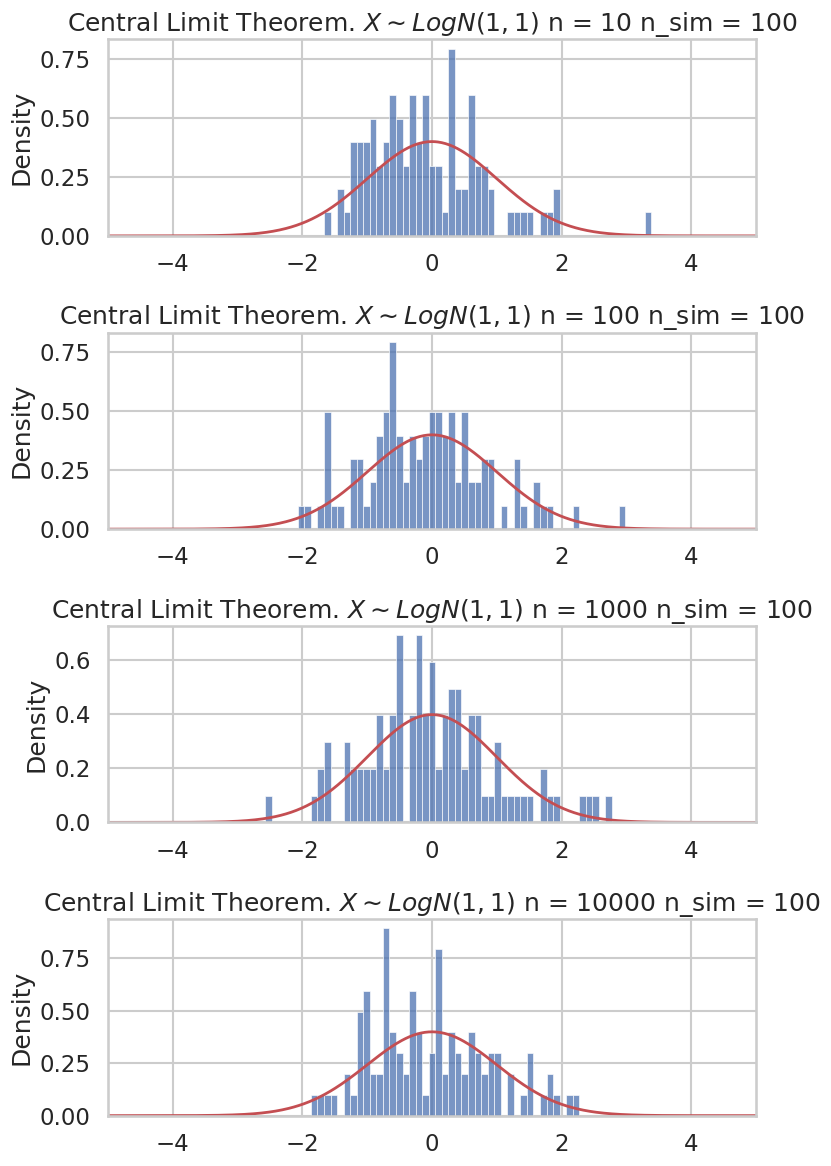

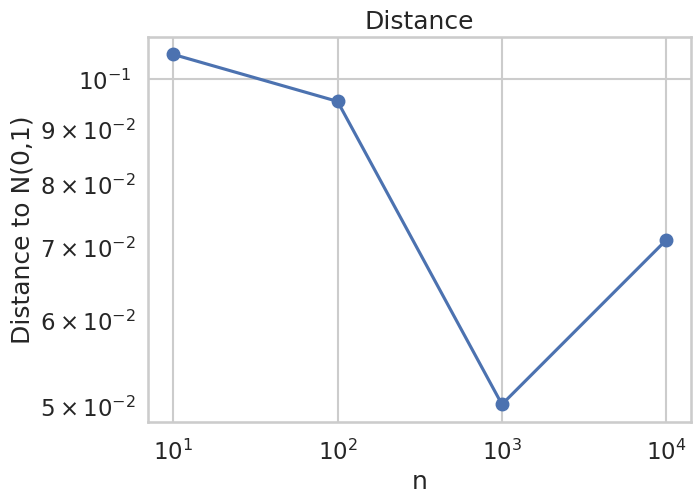

In [19]:
experiment(1, 1, 100, ns)

       n      mean       std  distance         p
0     10  0.707249  0.666347  0.448180       NaN
1    100 -0.596704  0.677141  0.337094 -0.123702
2   1000 -0.284270  0.701701  0.318841 -0.024176
3  10000 -0.005094  0.829494  0.216670 -0.167776


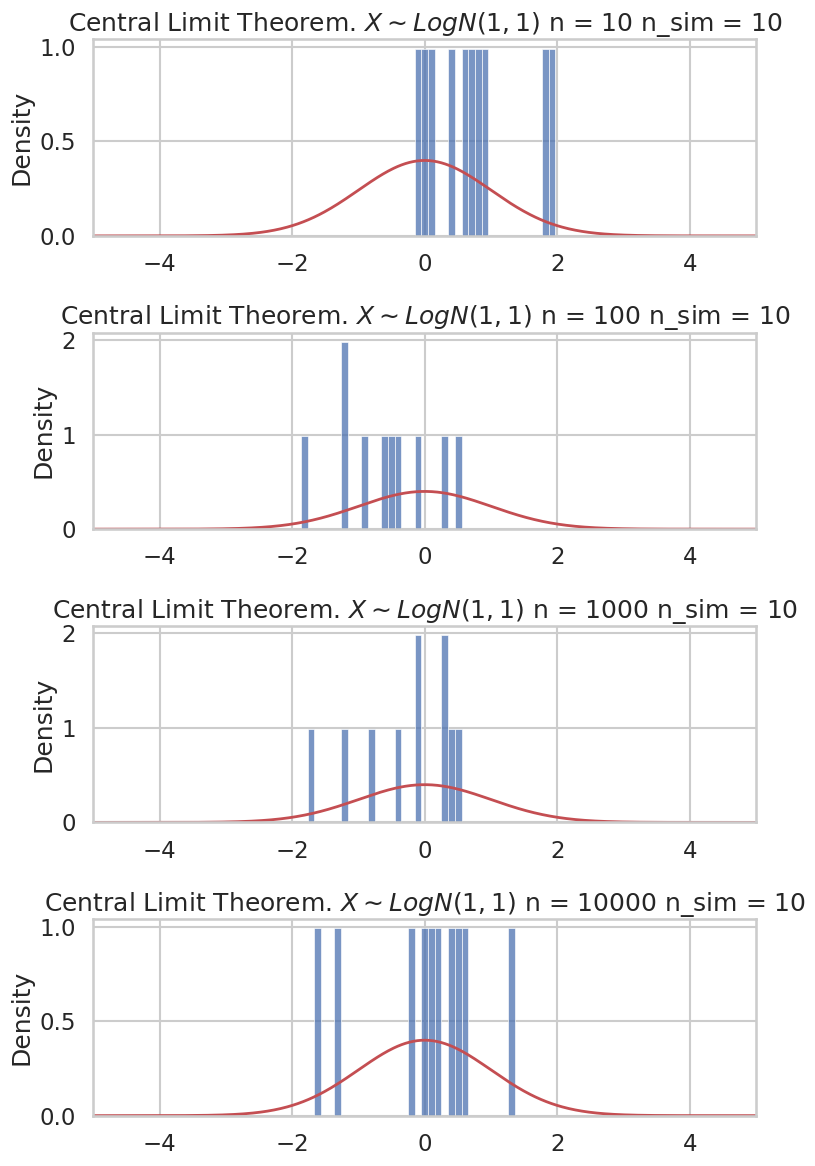

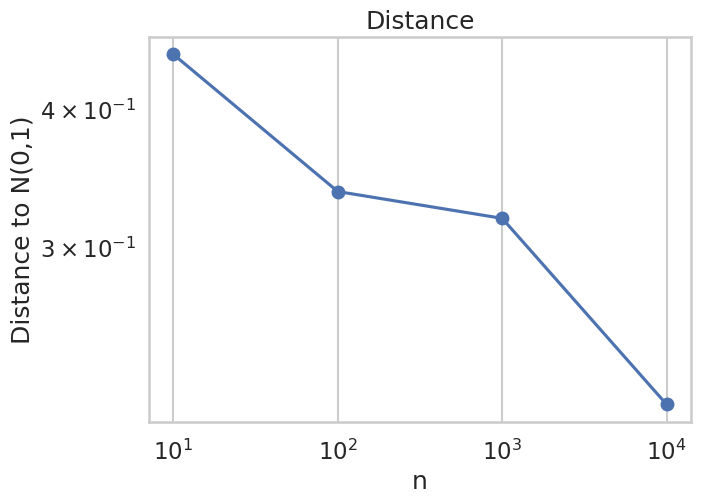

In [20]:
experiment(1, 1, 10, ns)

As $n$ decreases, the standard normal density curve becomes less visible.

As the number of simulations increases, the distance decreases. 

As the sample size $n$ increases, the distance also decreases. 

As the parameter $\sigma$ increases, the distance increases.